In [1]:
%config Completer.use_jedi = False

In [3]:
%matplotlib inline
import anndata
import scvelo as scv
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import palantir
import os
import matplotlib
import matplotlib.pyplot as plt

In [4]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']

plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 150


In [5]:
scv.set_figure_params(figsize = [3.0, 3.0], fontsize=20)
sc.set_figure_params(vector_friendly=True, dpi_save = 300)
plt.rcParams['axes.grid'] = False

In [6]:
import sys
sys.path.append(".../tools/modules")

import visual
rb_cmap = visual.beautiful_cmap("RdBu_r")

In [7]:
adata = sc.read_h5ad(".../mouse_glial_lineage/GSE201257_adata_processed.h5ad")

In [8]:
adata

AnnData object with n_obs × n_vars = 8842 × 21676
    obs: 'plates', 'devtime', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'doublet_scores', 'leiden', 'CytoTRACE'
    var: 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    uns: 'devtime_colors', 'leiden', 'leiden_colors', 'leiden_sizes', 'location_colors', 'log1p', 'neighbors', 'paga', 'umap'
    obsm: 'X_diff', 'X_pca', 'X_umap'
    layers: 'palantir_imp', 'scaled'
    obsp: 'connectivities', 'distances'

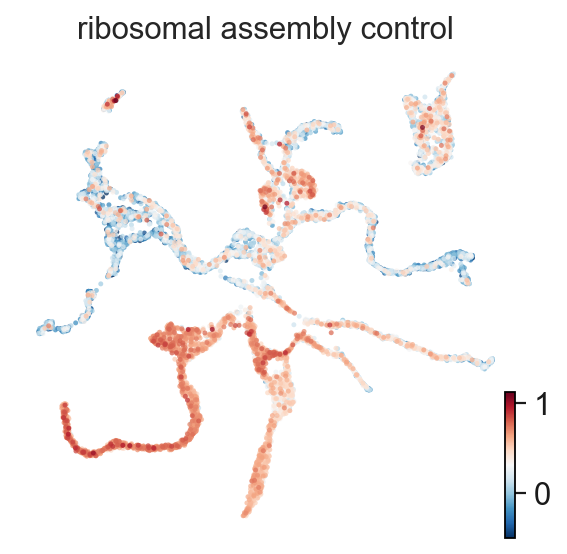

In [9]:
RiboAss_genes = ['Wdr74', 'Wdr75', 'Ncl', 'Nhp2', 'Eef1d', 'Ruvbl1', 'Ruvbl2', 'Ddx31','Emg1', 
                                         'Rrp8', 'Mrpl12', "Znhit6"]

sc.tl.score_genes(adata, gene_list = RiboAss_genes, score_name = 'ribosomal assembly control')

scv.pl.umap(adata, color=["ribosomal assembly control"], 
           color_map = "RdBu_r", frameon = False, size = 20, alpha = .75, vmin = -.5)

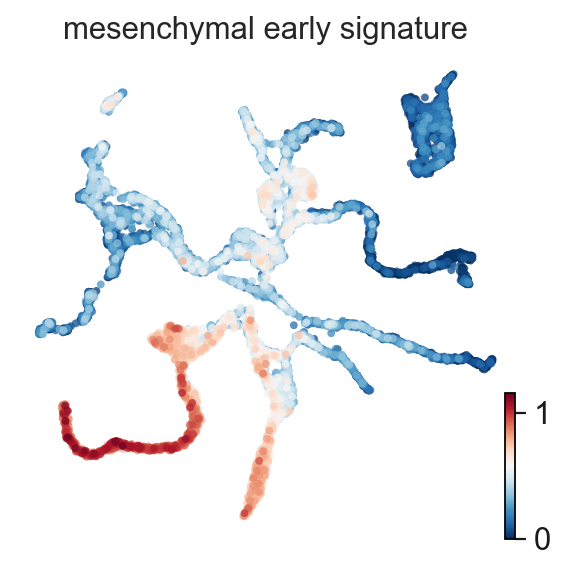

In [10]:
file_path = '.../new_mesenchymal_early_signature.txt'

mes_early_genes = [line.strip() for line in open(file_path, 'r').readlines()]

sc.tl.score_genes(adata, gene_list = mes_early_genes, score_name = 'mesenchymal early signature')
scv.pl.umap(adata, color='mesenchymal early signature', color_map = "RdBu_r", frameon = False, size = 50, alpha = .75, vmin = 0)

In [11]:
import magic

magic_op = magic.MAGIC()
adata_magic = magic_op.fit_transform(adata)

Calculating MAGIC...
  Running MAGIC on 8842 cells and 21676 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 64.02 seconds.
    Calculating KNN search...
    Calculated KNN search in 4.75 seconds.
    Calculating affinities...
    Calculated affinities in 4.69 seconds.
  Calculated graph and diffusion operator in 73.48 seconds.
  Running MAGIC with `solver='exact'` on 21676-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 21.03 seconds.
Calculated MAGIC in 95.64 seconds.


In [12]:
adata_magic.obsm = adata.obsm

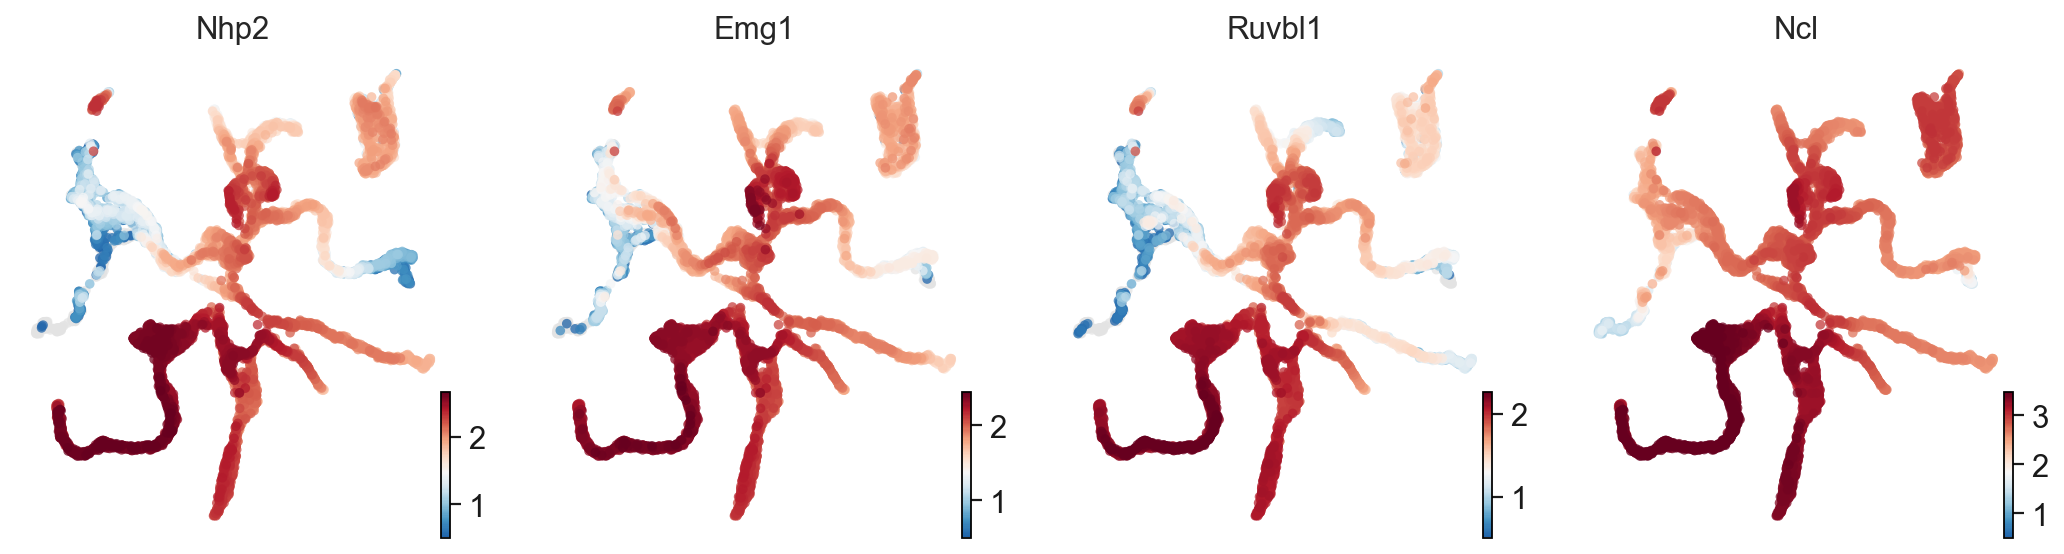

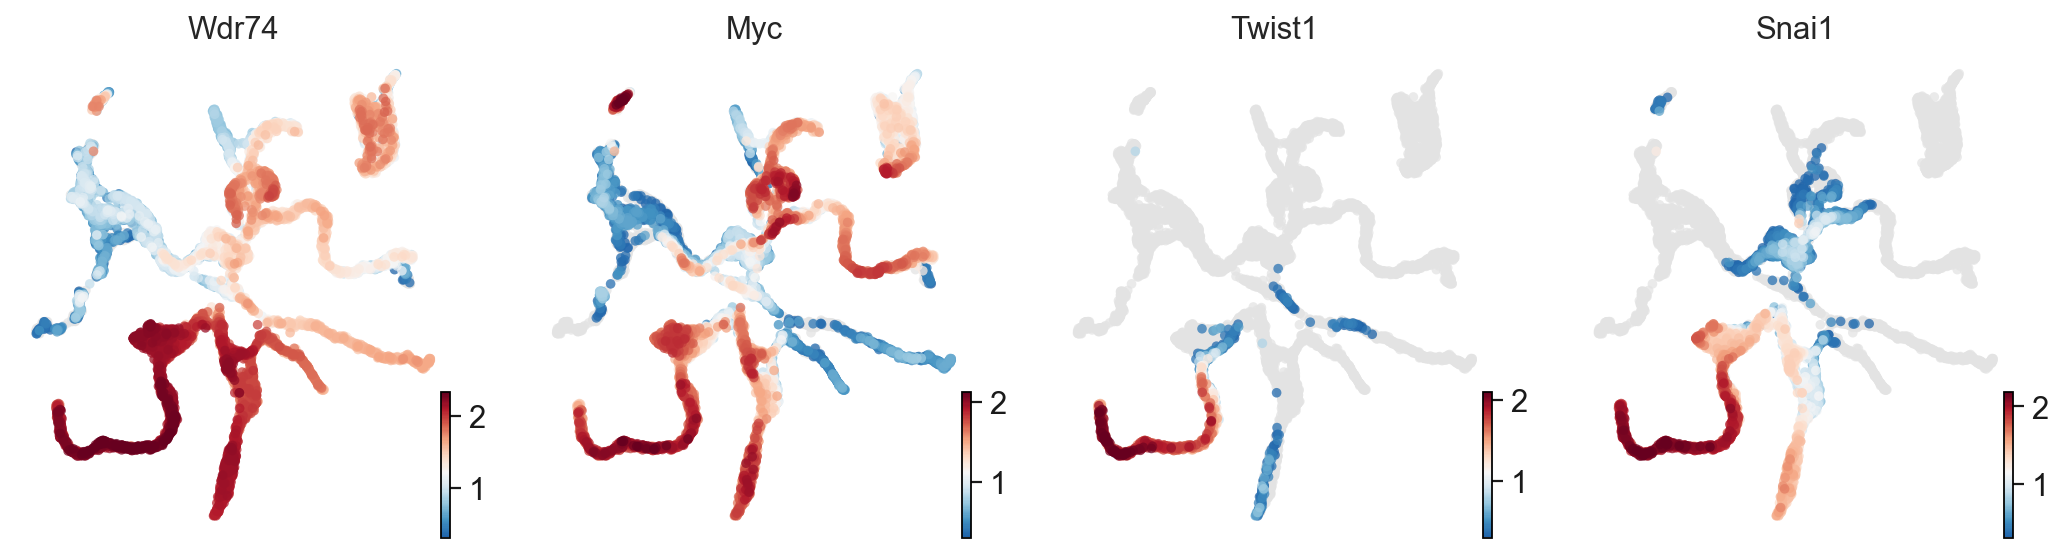

In [15]:
scv.pl.umap(adata_magic, color=["Nhp2", "Emg1", "Ruvbl1", "Ncl"], 
           color_map = rb_cmap, ncols = 4, frameon = False, size = 75, alpha = .75, vmin = .5)
scv.pl.umap(adata_magic, color=["Wdr74", "Myc", "Twist1", "Snai1"], 
           color_map = rb_cmap, ncols = 4, frameon = False, size = 75, alpha = .75, vmin = .3)
